In [60]:
from tdc.single_pred import ADME

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

from rdkit import Chem
from rdkit import RDLogger
from rdkit import DataStructs
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors.MoleculeDescriptors import MolecularDescriptorCalculator

### Lipophilicity

In [133]:
data = ADME(name = 'Lipophilicity_AstraZeneca')
#DF contains the whole dataset stored in a Pandas dataframe format 
df = data.get_data()
#Get_split divides the dataset into 3 different sets (Train, validation, test)
split_LIPO = data.get_split()

Found local copy...
Loading...
Done!


#### 1 - Statistics of the number of compounds that exist as fragments in all the 4 datasets (compounds that have dots in the SMILES – For eg.,  O=C([O-])c1ccccc1C(=O)O.[K+]; Here O=C([O-])c1ccccc1C(=O)O and [K+] are 2 different fragments )

In [134]:
index_compounds = [(ind, comp) for ind, comp in enumerate(df['Drug']) if len(comp.split('.')) > 1]
print('Total number of compounds that exist as fragments:',len(index_compounds))
print(index_compounds)

Total number of compounds that exist as fragments: 1
[(1646, 'CC(=O)O[C@@]12CO[C@@H]1C[C@H](O)[C@@]1(C)C(=O)[C@H](O)C3=C(C)[C@@H](OC(=O)[C@H](O)[C@@H](NC(=O)OC(C)(C)C)c4ccccc4)C[C@@](O)([C@@H](OC(=O)c4ccccc4)[C@@H]12)C3(C)C.O.O.O')]


#### 2 - Make the heavy atom count distributions and report the number of compounds with less than 5 heavy atoms

Number of compounds with less than 5 heavy atoms: 0
Mean: 27.04
Median: 27.0


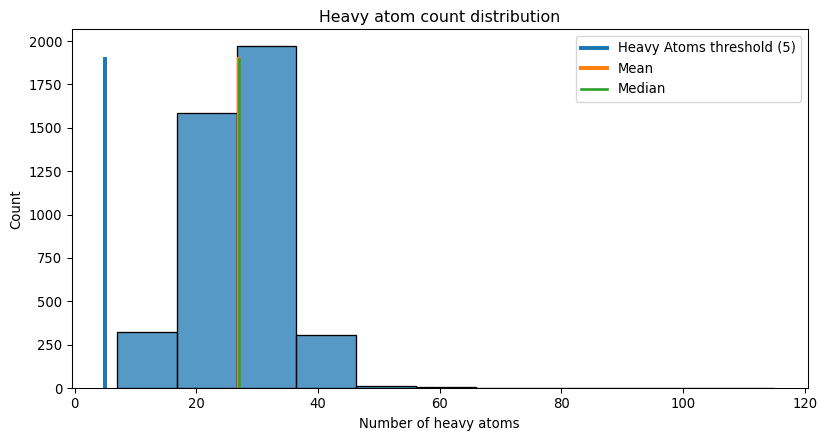

In [135]:
def heavy_atom_distribution(df):
    heavy_atoms = pd.Series([Chem.MolFromSmiles(smi).GetNumHeavyAtoms() for smi in df['Drug']])
    hist = np.histogram(heavy_atoms)

    print('Number of compounds with less than 5 heavy atoms:', len(heavy_atoms[heavy_atoms < 5]))
    print('Mean: %0.2f' %(heavy_atoms.mean()))
    print('Median:', heavy_atoms.median())

    #HISTOGRAM
    plt.figure(figsize=(10, 5), dpi = 95)
    sns.histplot(data=heavy_atoms, bins = len(hist[1]))
    # Heavy atoms threshold, 5
    plt.plot([5, 5], [0, max(hist[0])],linewidth = 3, label = 'Heavy Atoms threshold (5)')
    # Mean
    plt.plot([heavy_atoms.mean(), heavy_atoms.mean()], [0, max(hist[0])],linewidth = 3, label = 'Mean')
    # Median
    plt.plot([heavy_atoms.median(), heavy_atoms.median()], [0, max(hist[0])],linewidth = 2, label = 'Median')
    plt.xlabel('Number of heavy atoms')
    plt.title('Heavy atom count distribution')
    plt.legend()
    plt.show()

heavy_atom_distribution(df)

### AMES mutagenicity

In [136]:
from tdc.single_pred import Tox
data = Tox(name = 'AMES')
#DF contains the whole dataset stored in a Pandas dataframe format 
df = data.get_data()
#Get_split divides the dataset into 3 different sets (Train, validation, test)
split_AMES = data.get_split()

Found local copy...
Loading...
Done!


#### 1 - Statistics of the number of compounds that exist as fragments in all the 4 datasets (compounds that have dots in the SMILES – For eg.,  O=C([O-])c1ccccc1C(=O)O.[K+]; Here O=C([O-])c1ccccc1C(=O)O and [K+] are 2 different fragments )

In [137]:
index_compounds = [(ind, comp) for ind, comp in enumerate(df['Drug']) if len(comp.split('.')) > 1]
print('Total number of compounds that exist as fragments:',len(index_compounds))
print(index_compounds)

Total number of compounds that exist as fragments: 0
[]


#### 2 - Make the heavy atom count distributions and report the number of compounds with less than 5 heavy atoms

Number of compounds with less than 5 heavy atoms: 115
Mean: 16.75
Median: 16.0


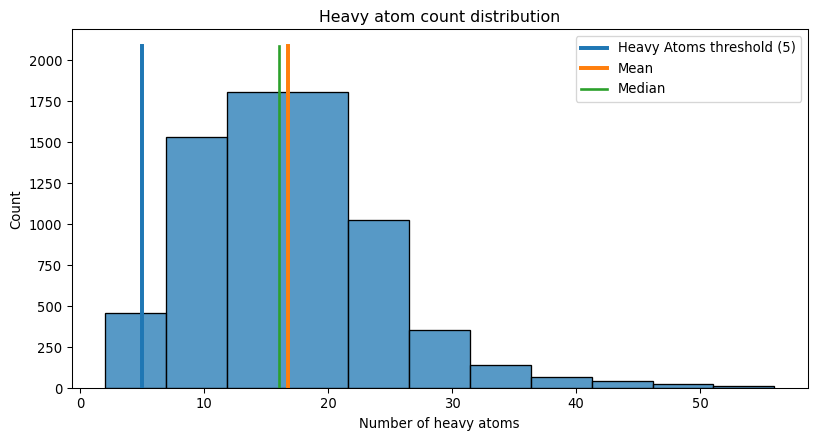

In [138]:
heavy_atom_distribution(df)

#### Calculating descriptors

In [7]:
# Generate a list of lists where each row corresponds to a molecule and each column to a descriptor
c = [calculator.CalcDescriptors(Chem.MolFromSmiles(smi)) for smi in df['Drug'] 
     if Chem.MolFromSmiles(smi).GetNumHeavyAtoms() > 5]

In [13]:
c = np.asarray(c).transpose()
# Append all the descriptors to the DF
for i, descriptor in enumerate(descList):
    df[descriptor] = c[i]
    
#We move the target (lipophilicity value) to the end
temp = df.pop('Y') # remove column b and store it in df1
df['Y'] = temp

print('Actual shape of the Dataframe:', df.shape)

Actual shape of the Dataframe: (4200, 211)


In [26]:
df.head()

,Drug_ID,Drug,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,Y
0,CHEMBL596271,Cn1c(CN2CCN(c3ccc(Cl)cc3)CC2)nc2ccccc21,5.976320,0.790958,5.976320,0.790958,0.728444,340.858,319.690,340.145474,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.54
1,CHEMBL1951080,COc1cc(OC)c(S(=O)(=O)N2c3ccccc3CCC2C)cc1NC(=O)...,13.847757,-4.060285,13.847757,0.083663,0.545587,494.591,468.383,494.118143,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.18
2,CHEMBL1771,COC(=O)[C@H](c1ccccc1Cl)N1CCc2sccc2C1,12.294248,-0.447454,12.294248,0.262241,0.807761,321.829,305.701,321.059027,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.69
3,CHEMBL234951,O=C(NC1Cc2ccccc2N(C[C@@H](O)CO)C1=O)c1cc2cc(Cl...,12.966133,-1.063518,12.966133,0.046181,0.506650,419.890,401.746,419.070655,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.37
4,CHEMBL565079,Cc1cccc(C[C@H](NC(=O)c2cc(C(C)(C)C)nn2C)C(=O)N...,12.834652,-0.795707,12.834652,0.112199,0.747686,381.480,354.264,381.216475,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.10
